# TASK 5

# CREDIT CARD FRAUD DETECTION

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

In [9]:
cc_data = pd.read_csv("D:/internship_projects/creditcard.csv")

In [11]:
cc_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
cc_data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [17]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
# no null values
# so no handling 

# DATA VISUALIZATION

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

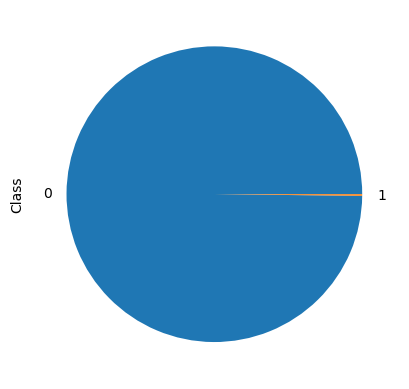

In [24]:
print((cc_data.groupby('Class')['Class'].count()/cc_data['Class'].count())*100)
((cc_data.groupby('Class')['Class'].count()/cc_data['Class'].count())*100).plot.pie()

In [26]:
# Correlation of the features

In [28]:
cr = cc_data.corr()
cr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


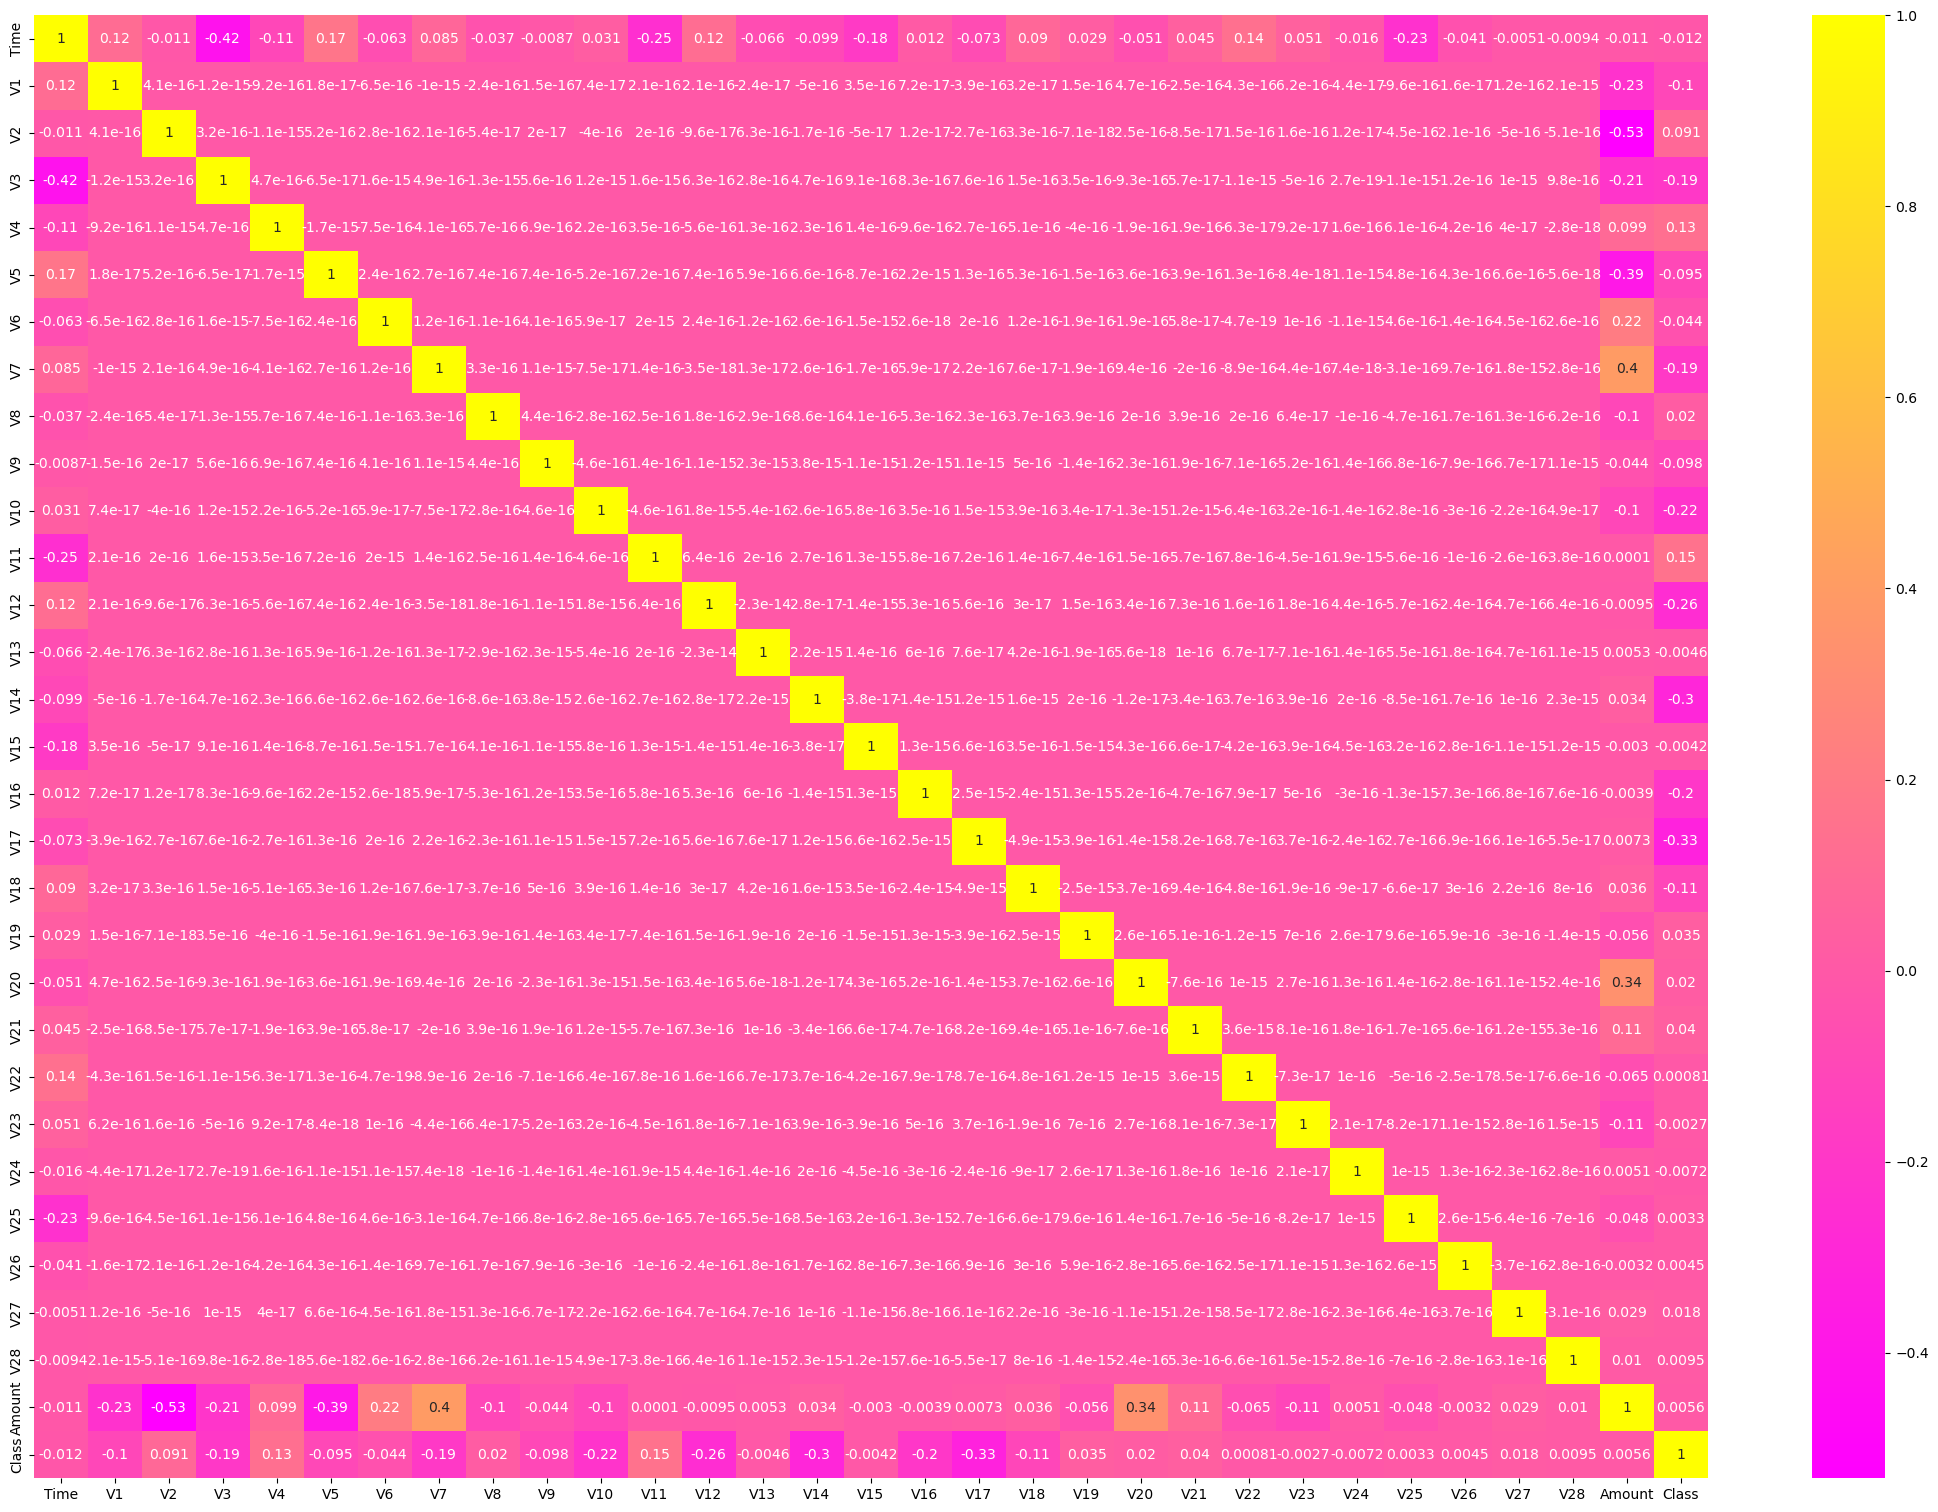

In [30]:
# Heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(cr, cmap = 'spring', annot= True )
plt.show()

In [32]:
# separtion of the data according to type of transaction 

In [34]:
legit = cc_data[cc_data.Class == 0]
fraud = cc_data[cc_data.Class==1]
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [36]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [38]:
# Mean amount spent for fraud transactions is more than for the legit ones

In [40]:
cc_data.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [42]:
cc_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [44]:
# there's a significant difference in the mean value for our normal transaction and mean value for our fraud transactions
#now to balance the data for legit and fraud transaction value points 
# we will use sampling for creating a new dataset of normal transactions with 492 entries being selected randomly out of 284807

In [46]:
normal_sample = legit.sample(n=492)

In [48]:
n_d = pd.concat([normal_sample, fraud], axis = 0)

In [50]:
n_d

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255025,157027.0,-0.549562,1.135333,-0.080690,-0.420357,0.267166,-0.620938,0.676993,0.382540,-0.025862,...,-0.165467,-0.509909,0.122876,0.663687,-0.472292,-0.597950,0.282890,0.195271,24.00,0
41595,40752.0,0.964047,-0.991671,0.737523,0.673593,-1.267591,0.102973,-0.664138,0.102015,-0.359720,...,-0.132726,-0.076404,-0.145740,0.054925,0.374375,-0.206660,0.061811,0.055379,158.00,0
52107,45278.0,1.257581,0.389792,0.316394,0.688601,-0.329816,-1.062477,0.117713,-0.230186,-0.037977,...,-0.282539,-0.791483,0.124223,0.358095,0.232011,0.092895,-0.019934,0.031739,1.29,0
210658,138074.0,-0.080099,0.993432,-2.224326,1.181087,0.405853,-1.304923,2.089831,-0.205384,-0.946068,...,0.664317,1.810254,0.422781,0.070635,-1.018975,-0.367562,0.410989,0.357872,203.27,0
103614,68733.0,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,...,-0.258437,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [52]:
n_d['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [54]:
n_d.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93494.813008,-0.051264,-0.073783,0.002372,0.010442,0.064129,0.042180,-0.006735,0.017756,-0.035620,...,0.048296,0.038169,-0.024005,0.006693,0.040279,0.003500,0.074181,-0.016562,-0.014231,94.264085
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [56]:
# Dropping time feature
delta_time = pd.to_timedelta(n_d['Time'], unit = 's')
# create the derived column
n_d['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
n_d.drop(columns='Time', axis=1, inplace = True)

In [58]:
n_d

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,time_hour
255025,-0.549562,1.135333,-0.080690,-0.420357,0.267166,-0.620938,0.676993,0.382540,-0.025862,-0.744393,...,-0.509909,0.122876,0.663687,-0.472292,-0.597950,0.282890,0.195271,24.00,0,19
41595,0.964047,-0.991671,0.737523,0.673593,-1.267591,0.102973,-0.664138,0.102015,-0.359720,0.603336,...,-0.076404,-0.145740,0.054925,0.374375,-0.206660,0.061811,0.055379,158.00,0,11
52107,1.257581,0.389792,0.316394,0.688601,-0.329816,-1.062477,0.117713,-0.230186,-0.037977,-0.296117,...,-0.791483,0.124223,0.358095,0.232011,0.092895,-0.019934,0.031739,1.29,0,12
210658,-0.080099,0.993432,-2.224326,1.181087,0.405853,-1.304923,2.089831,-0.205384,-0.946068,0.061973,...,1.810254,0.422781,0.070635,-1.018975,-0.367562,0.410989,0.357872,203.27,0,14
103614,1.212868,0.314473,0.280272,0.642528,-0.173938,-0.599932,0.017676,-0.072350,0.009880,-0.330543,...,-0.705438,0.157189,0.037345,0.147432,0.123681,-0.005811,0.027712,1.98,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1,22
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1,23
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1,23
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1,23


# Separating the features and target variables

In [61]:
x = n_d.drop('Class', axis=1)
y = n_d['Class']
x.shape

(984, 30)

In [63]:
y.shape

(984,)

# Splitting the data into training and testing data 

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [70]:
cols = list(x.columns.values)

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Sample DataFrame
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Survived': [0, 1, 1, 0],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Drop non-numeric columns (if they are not needed)
tn_data = tn_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Convert categorical columns to numeric using one-hot encoding
tn_data = pd.get_dummies(tn_data, columns=['Sex', 'Embarked'])

# Define features and target
X = tn_data.drop(columns=['Survived'])
Y = tn_data['Survived']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled data and increased max_iter
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, Y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

# Check the unique values in the predictions
print("Unique values in predictions:", np.unique(y_pred))

# Calculate precision with zero_division parameter to handle undefined metric
precision = precision_score


Unique values in predictions: [1]


# Model Evaulation

In [79]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
def Plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.show()

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Sample DataFrame
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Survived': [0, 1, 1, 0],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Drop non-numeric columns (if they are not needed)
tn_data = tn_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Convert categorical columns to numeric using one-hot encoding
tn_data = pd.get_dummies(tn_data, columns=['Sex', 'Embarked'])

# Define features and target
X = tn_data.drop(columns=['Survived'])
Y = tn_data['Survived']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled data and increased max_iter
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, Y_train)

# Generate predictions on the training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy and precision on the training set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred, zero_division=0)
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

# Calculate accuracy and precision on the test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred, zero_division=0)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)

# If needed, try a different model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, Y_train)

# Generate predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate precision with zero_division parameter to handle undefined metric
precision_rf = precision_score(Y_test, y_pred_rf, zero_division=0)
print("Precision with RandomForest:", precision_rf)


Training Accuracy: 1.0
Training Precision: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
Precision with RandomForest: 0.0


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Sample DataFrame
tn_data = pd.DataFrame({
    'PassengerId': [1, 2, 3, 4],
    'Name': ['Name1', 'Name2', 'Name3', 'Name4'],
    'Ticket': ['A123', 'B456', 'C789', 'D012'],
    'Survived': [0, 1, 1, 0],
    'Sex': ['male', 'female', 'female', 'male'],
    'Embarked': ['S', 'C', 'Q', 'S']
})

# Drop non-numeric columns (if they are not needed)
tn_data = tn_data.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Convert categorical columns to numeric using one-hot encoding
tn_data = pd.get_dummies(tn_data, columns=['Sex', 'Embarked'])

# Define features and target
X = tn_data.drop(columns=['Survived'])
Y = tn_data['Survived']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model with scaled data and increased max_iter
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, Y_train)

# Generate predictions on the training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy and precision on the training set
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred, zero_division=0)
print("Training Accuracy:", train_accuracy)
print("Training Precision:", train_precision)

# Calculate accuracy and precision on the test set
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred, zero_division=0)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)


Training Accuracy: 1.0
Training Precision: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
